In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [6]:
df.drop('dish_liked' , axis = 1, inplace = True)

In [7]:
def handle_rate(value):
  if value =="NEW" or value == "-":
    return np.nan
  else:
    value = str(value).split('/')[0]
    return float(value)

try:
    df['rate'] = df['rate'].apply(handlerate)
except:
    # If there are already NaNs, this simpler version handles them
    df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)
    df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])
    df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [8]:
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [9]:
df.dropna(subset=['rate'], inplace=True)
print(df.isnull().sum())

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          814
location                         0
rest_type                      149
cuisines                        11
approx_cost(for two people)    247
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64


In [10]:
df.drop(columns=['phone', 'url'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41665 non-null  object 
 1   name                         41665 non-null  object 
 2   online_order                 41665 non-null  object 
 3   book_table                   41665 non-null  object 
 4   rate                         41665 non-null  float64
 5   votes                        41665 non-null  int64  
 6   location                     41665 non-null  object 
 7   rest_type                    41516 non-null  object 
 8   cuisines                     41654 non-null  object 
 9   approx_cost(for two people)  41418 non-null  object 
 10  reviews_list                 41665 non-null  object 
 11  menu_item                    41665 non-null  object 
 12  listed_in(type)              41665 non-null  object 
 13  listed_in(city)      

In [11]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,149
cuisines,11
approx_cost(for two people),247


In [12]:
df.dropna(subset=['cuisines'], inplace=True)
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,149
cuisines,0
approx_cost(for two people),244


In [13]:
df.rename(columns={'approx_cost(for two people)': 'cost',
                   'listed_in(type)': 'type',
                   'listed_in(city)': 'city'}, inplace=True)

# 7. CLEAN 'cost' column (Remove commas)
def handlecost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
    return float(value)

df['cost'] = df['cost'].apply(handlecost)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41654 non-null  object 
 1   name          41654 non-null  object 
 2   online_order  41654 non-null  object 
 3   book_table    41654 non-null  object 
 4   rate          41654 non-null  float64
 5   votes         41654 non-null  int64  
 6   location      41654 non-null  object 
 7   rest_type     41505 non-null  object 
 8   cuisines      41654 non-null  object 
 9   cost          41410 non-null  float64
 10  reviews_list  41654 non-null  object 
 11  menu_item     41654 non-null  object 
 12  type          41654 non-null  object 
 13  city          41654 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.8+ MB


In [15]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,149
cuisines,0
cost,244


In [16]:
df.dropna(subset=['cost'], inplace=True)
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,147
cuisines,0
cost,0


In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
cost,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41263 non-null  object 
 1   name          41263 non-null  object 
 2   online_order  41263 non-null  object 
 3   book_table    41263 non-null  object 
 4   rate          41263 non-null  float64
 5   votes         41263 non-null  int64  
 6   location      41263 non-null  object 
 7   rest_type     41263 non-null  object 
 8   cuisines      41263 non-null  object 
 9   cost          41263 non-null  float64
 10  reviews_list  41263 non-null  object 
 11  menu_item     41263 non-null  object 
 12  type          41263 non-null  object 
 13  city          41263 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.7+ MB


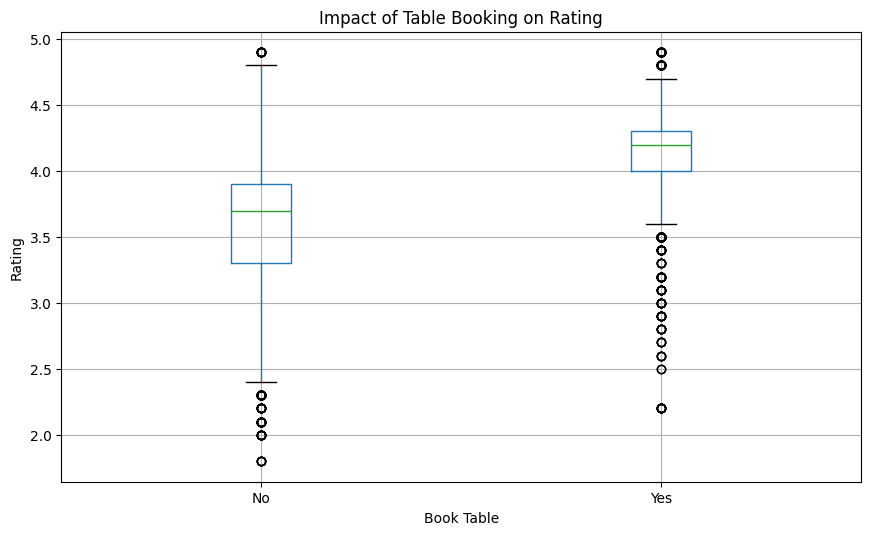

In [20]:
df.boxplot(column='rate', by='book_table', figsize=(10,6), grid=True)

plt.title('Impact of Table Booking on Rating')
plt.suptitle('')
plt.ylabel('Rating')
plt.xlabel('Book Table')
plt.show()

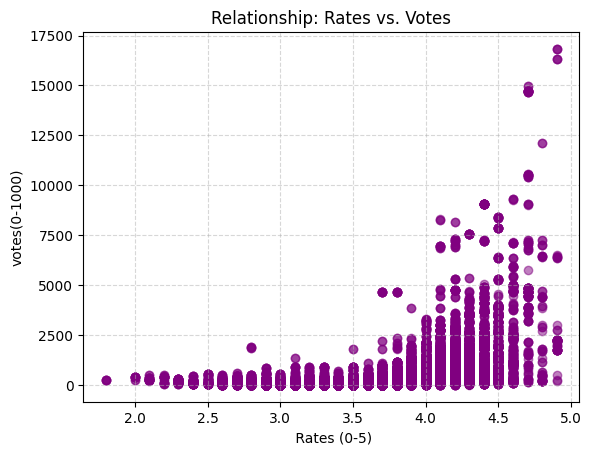

In [21]:
df.rate.count()
plt.scatter(df['rate'], df['votes'], alpha=0.5, color='purple')
plt.title('Relationship: Rates vs. Votes')
plt.xlabel(' Rates (0-5)')
plt.ylabel('votes(0-1000)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

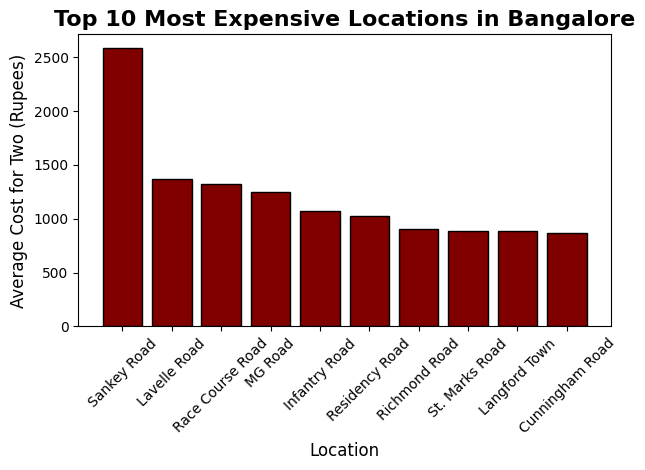

In [22]:
top_expensive = df.groupby('location')['cost'].mean().sort_values(ascending = False).head(10)
locations = top_expensive.index
average_costs = top_expensive.values

plt.bar(locations,average_costs,color='maroon', edgecolor='black')
plt.title('Top 10 Most Expensive Locations in Bangalore', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Cost for Two (Rupees)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

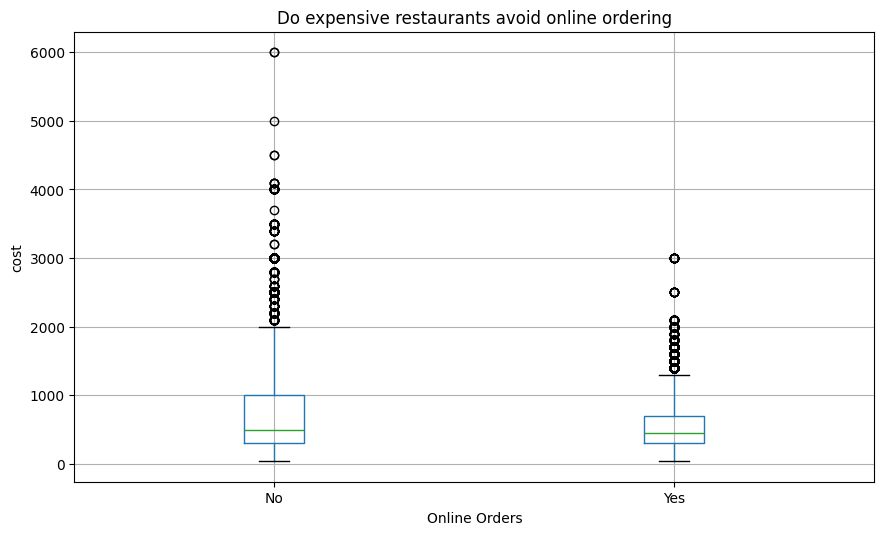

In [23]:
df.boxplot(column='cost', by='online_order', figsize=(10,6), grid=True)

plt.title('Do expensive restaurants avoid online ordering')
plt.suptitle('')
plt.ylabel('cost')
plt.xlabel('Online Orders')
plt.show()

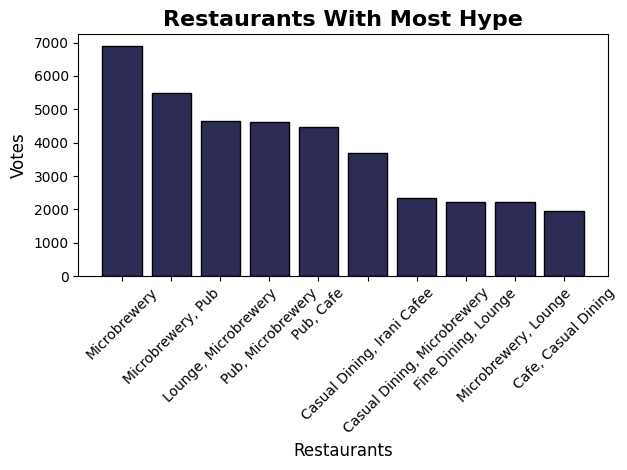

In [24]:
type_votes = df.groupby('rest_type')['votes'].mean().sort_values(ascending = False).head(10)
rests_types = type_votes.index
hype_votes = type_votes.values

plt.bar(rests_types,hype_votes,color='#2C2C54', edgecolor='black')
plt.title('Restaurants With Most Hype', fontsize=16, fontweight='bold')
plt.xlabel('Restaurants', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

rate vs price (Sweet Spot)

/tmp/ipython-input-1289429107.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = df.groupby('price_range')['rate'].mean()


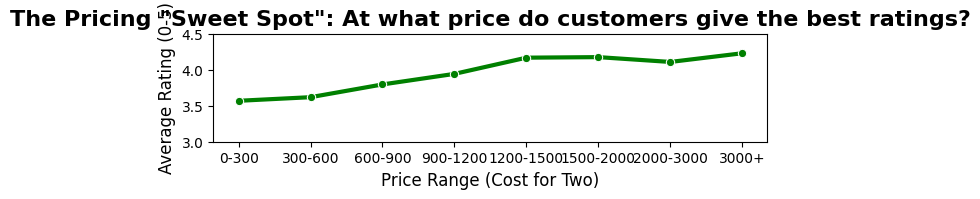

In [27]:
bins = [0,300,600,900,1200,1500,2000,3000,5000]
labels = ['0-300','300-600','600-900','900-1200','1200-1500','1500-2000','2000-3000','3000+']
df['price_range'] = pd.cut(df['cost'], bins=bins, labels=labels)
price_rating = df.groupby('price_range')['rate'].mean()
plt.subplot(3,1,3)
sns.lineplot( x=price_rating.index, y = price_rating.values, marker='o',color = 'green',linewidth=3)
plt.title('The Pricing "Sweet Spot": At what price do customers give the best ratings?', fontsize=16, fontweight='bold')
plt.xlabel('Price Range (Cost for Two)', fontsize=12)
plt.ylabel('Average Rating (0-5)', fontsize=12)
plt.ylim(3.0, 4.5) # Zoom in to see the curve clearly

plt.tight_layout()
plt.show()
